In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set(style="whitegrid")

In [3]:

df = pd.read_csv("Walmart.csv")

In [4]:
print(df.head())

   invoice_id   Branch         City                category unit_price  \
0           1  WALM003  San Antonio       Health and beauty     $74.69   
1           2  WALM048    Harlingen  Electronic accessories     $15.28   
2           3  WALM067  Haltom City      Home and lifestyle     $46.33   
3           4  WALM064      Bedford       Health and beauty     $58.22   
4           5  WALM013       Irving       Sports and travel     $86.31   

   quantity      date      time payment_method  rating  profit_margin  
0       7.0  05/01/19  13:08:00        Ewallet     9.1           0.48  
1       5.0  08/03/19  10:29:00           Cash     9.6           0.48  
2       7.0  03/03/19  13:23:00    Credit card     7.4           0.33  
3       8.0  27/01/19  20:33:00        Ewallet     8.4           0.33  
4       7.0  08/02/19  10:37:00        Ewallet     5.3           0.48  


In [5]:
# Cleaning
df['unit_price'] = df['unit_price'].replace('[\$,]', '', regex=True).astype(float)
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_datetime(df['time']).dt.hour

C:\Users\karan\AppData\Local\Temp\ipykernel_14816\2462747747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])
C:\Users\karan\AppData\Local\Temp\ipykernel_14816\2462747747.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


In [6]:

# Feature Engineering
df['total_sales'] = df['unit_price'] * df['quantity']
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [7]:

print("Total Revenue:", round(df['total_sales'].sum(), 2))
print("Average Order Value:", round(df['total_sales'].mean(), 2))
print("Average Rating:", round(df['rating'].mean(), 2))
print("\nTop Category by Revenue:")
print(df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(1))

print("\nPeak Sales Hour:")
print(df.groupby('hour')['quantity'].sum().idxmax())

# Statistical Analysis
print("\nCorrelation with Sales:")
print(df[['unit_price','quantity','rating','profit_margin','total_sales']].corr()['total_sales'])

Total Revenue: 1214825.38
Average Order Value: 121.24
Average Rating: 5.83

Top Category by Revenue:
category
Home and lifestyle    491996.06
Name: total_sales, dtype: float64

Peak Sales Hour:
15

Correlation with Sales:
unit_price       0.530288
quantity         0.800098
rating           0.111038
profit_margin   -0.001917
total_sales      1.000000
Name: total_sales, dtype: float64


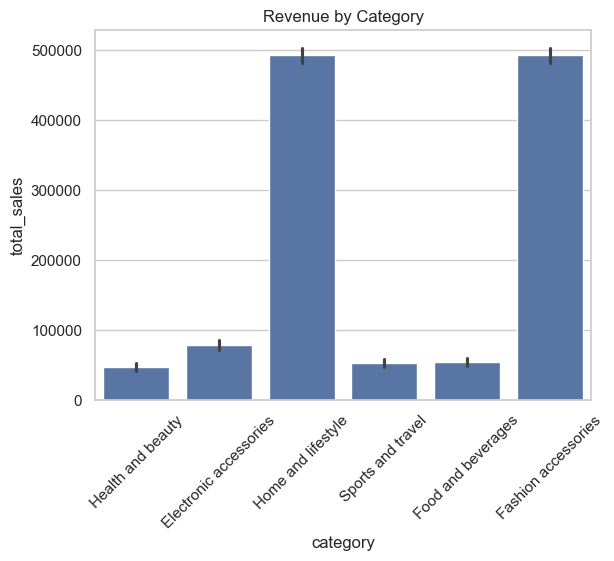

In [8]:
# Revenue by Category
plt.figure()
sns.barplot(x='category', y='total_sales', data=df, estimator=sum)
plt.title("Revenue by Category")
plt.xticks(rotation=45)
plt.show()


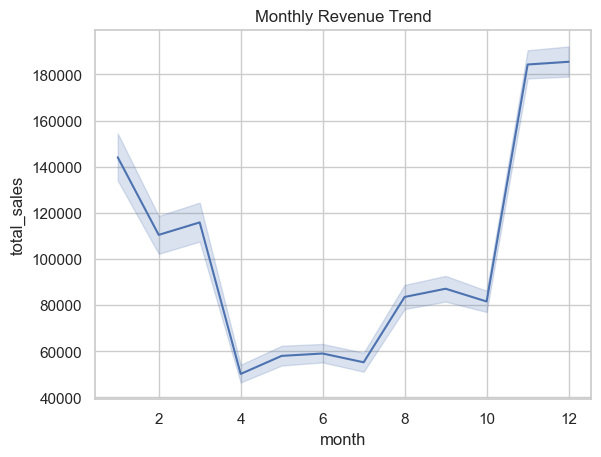

In [9]:
# Monthly Revenue Trend
plt.figure()
sns.lineplot(x='month', y='total_sales', data=df, estimator=sum)
plt.title("Monthly Revenue Trend")
plt.show()

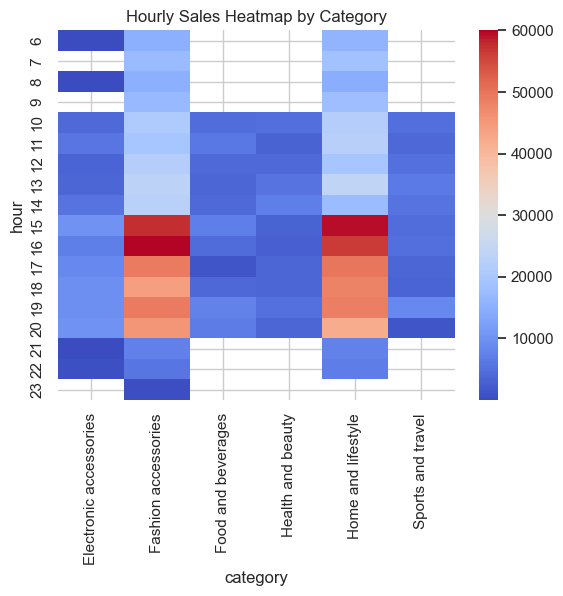

In [10]:
# Hourly Sales Heatmap
hourly_sales = df.pivot_table(values='total_sales', index='hour', columns='category', aggfunc='sum')
plt.figure()
sns.heatmap(hourly_sales, cmap="coolwarm")
plt.title("Hourly Sales Heatmap by Category")
plt.show()

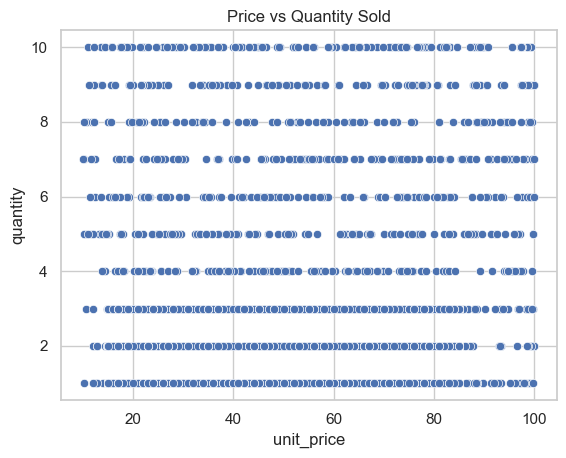

In [11]:
# Price vs Quantity (Demand Curve)
plt.figure()
sns.scatterplot(x='unit_price', y='quantity', data=df)
plt.title("Price vs Quantity Sold")
plt.show()

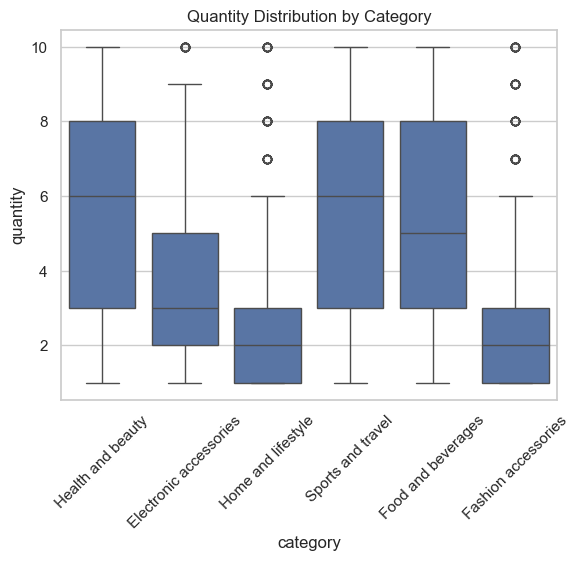

In [12]:
# Category-wise Quantity Distribution
plt.figure()
sns.boxplot(x='category', y='quantity', data=df)
plt.xticks(rotation=45)
plt.title("Quantity Distribution by Category")
plt.show()

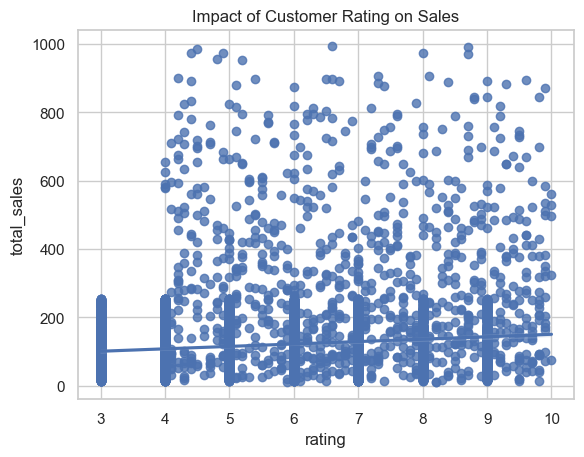

In [13]:
# Rating Impact on Sales
plt.figure()
sns.regplot(x='rating', y='total_sales', data=df)
plt.title("Impact of Customer Rating on Sales")
plt.show()

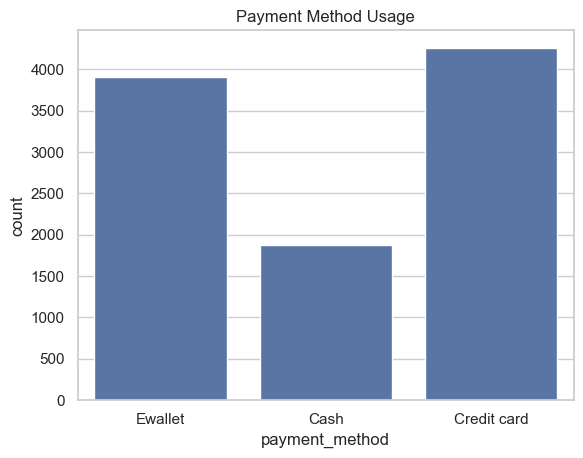

In [14]:
plt.figure()
sns.countplot(x='payment_method', data=df)
plt.title("Payment Method Usage")
plt.show()

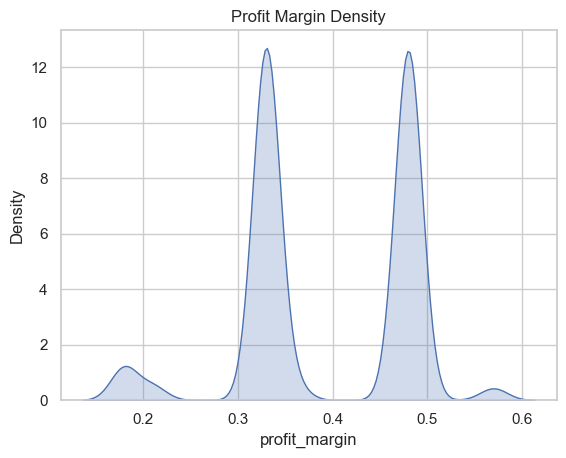

In [15]:
plt.figure()
sns.kdeplot(df['profit_margin'], fill=True)
plt.title("Profit Margin Density")
plt.show()


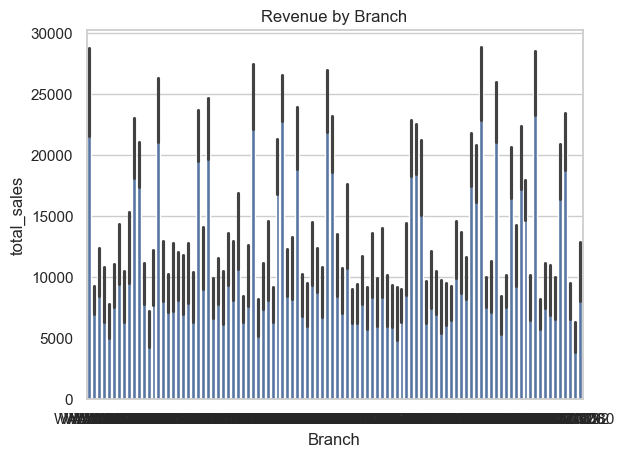

In [16]:
plt.figure()
sns.barplot(x='Branch', y='total_sales', data=df, estimator=sum)
plt.title("Revenue by Branch")
plt.show()

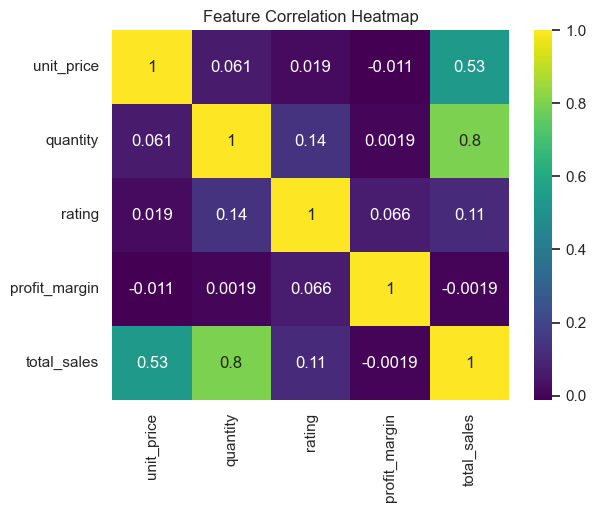

In [17]:
plt.figure()
corr = df[['unit_price','quantity','rating','profit_margin','total_sales']].corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df_sorted = df.sort_values('date')
df_sorted['cumulative_sales'] = df_sorted['total_sales'].cumsum()

plt.figure()
sns.lineplot(x=df_sorted['date'], y=df_sorted['cumulative_sales'])
plt.title("Cumulative Revenue Growth Over Time")
plt.show()